# Yelp Data Review Scraping
### Div Dasani

Scraped review data from Yelp ([data source](https://www.yelp.com/dataset)) and paired with data provided by Facebook to understand population sentiment regarding different types of restaurants in San Francisco.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First, the data is read in as a Pandas dataframe. There are two datasets, one containing business information and another containing reviews for different businesses. Thus, these datasets are joined on *business_id*, and irrelevant parameters are removed from the dataframe. Below is a sample of what the cleaned data looks like.

In [2]:
df_reviews = pd.read_csv('yelp_review.csv')
df_businesses = pd.read_csv('yelp_business.csv')

df_merged = pd.merge(df_reviews, df_businesses, on='business_id', how='left')
df_merged = df_merged[['stars_x','text','name','categories']]
df_merged.head()

,stars_x,text,name,categories
0,5,Super simple place but amazing nonetheless. It...,"""Wilensky's""",Diners;Food;Restaurants;Delis
1,5,Small unassuming place that changes their menu...,"""Tuck Shop""",Restaurants;Canadian (New);Italian
2,5,Lester's is located in a beautiful neighborhoo...,"""Lester's Deli""",Specialty Food;Food;Sandwiches;Restaurants;Bur...
3,4,Love coming here. Yes the place always needs t...,"""Five Guys""",Fast Food;Restaurants;Burgers
4,4,Had their chocolate almond croissant and it wa...,"""Maison Christian Faure""",Bakeries;Restaurants;Food;Sandwiches;Cafes;Cof...


Next, information regarding the number of reviews and average star rating are extracted for several different types of restaurants.

In [3]:
types = ['Mexican','Italian','Japanese','Mediterranean','Chinese','Vietnamese','Indian']
reviews = []
ratings = []
for type in types:
    df_type = df_merged[df_merged['categories'].str.contains(type)]
    ratings.append(len(df_type))
    reviews.append(df_type[['stars_x']].mean(axis=0))

types.append('Average')
reviews.append(np.mean(reviews))
ratings.append(np.mean(ratings))

Finally, this data is illustrated as a scatterplot, where the number of reviews is used to represent the popularity of a restaurant type, while the average review is used to represent how satisfied consumers are with this type of restaurant.
<br>
<br>
As depicted by the chart, Chinese restaurants have above average popularity, but are far less satisfying for coonsumers than the average restaurant. For this reason, we recommended Zuck open a Chinese restaurant, and focus on differentiating himself from the competition by understanding the negative aspects of these establishments (through review data), and making sure to avoid those in his business.
<br>
<br>
An alternate recommendation would be a Mexican restaurant, as these are very popular among San Francisco residents. However, these restaurants are only slightly below the average in satisfaction score, so it may be hard for Zuck to distinguish himself from his competition.

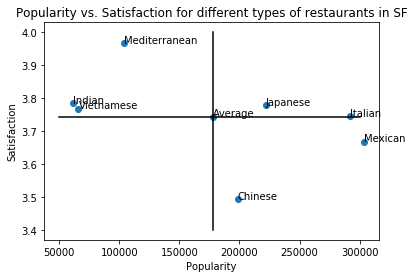

In [23]:
fig, ax = plt.subplots()
ax.scatter(ratings, reviews)

for i in range(len(types)): 
    ax.annotate(types[i], (ratings[i], reviews[i]))

plt.xlabel('Popularity')
plt.ylabel('Satisfaction')
plt.title('Popularity vs. Satisfaction for different types of restaurants in SF')
plt.plot(ratings[-1]*np.ones(7), np.linspace(3.4,4,7), color='k')
plt.plot(np.linspace(5*10**4,30*10**4,7), reviews[-1]*np.ones(7), color='k')
plt.show()